In [8]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np   
import pandas as pd  

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [49]:
RAW_DATA_PATH_X = '/Users/piyush/Desktop/dsml_Portfolio/visa/data/processed/X.csv'
RAW_DATA_PATH_y = '/Users/piyush/Desktop/dsml_Portfolio/visa/data/processed/y.csv'
X = pd.read_csv(RAW_DATA_PATH_X)
y = pd.read_csv(RAW_DATA_PATH_y)

In [70]:
from sklearn.model_selection import KFold
pipelines = []
pipelines.append(('LogisticRegression' , (Pipeline([('LR' ,LogisticRegression())]))))
pipelines.append(('SVC' , (Pipeline([('SVC' ,LinearSVC())]))))
pipelines.append(('MultinomailNB' , (Pipeline([('MNB' ,MultinomialNB())]))))
pipelines.append(('RandomForest' , (Pipeline([('RF' ,RandomForestClassifier())]))))
pipelines.append(('XGBoost' , (Pipeline([('XGB' ,XGBClassifier())]))))

    

In [71]:
pipelines

[('LogisticRegression', Pipeline(steps=[('LR', LogisticRegression())])),
 ('SVC', Pipeline(steps=[('SVC', LinearSVC())])),
 ('MultinomailNB', Pipeline(steps=[('MNB', MultinomialNB())])),
 ('RandomForest', Pipeline(steps=[('RF', RandomForestClassifier())])),
 ('XGBoost',
  Pipeline(steps=[('XGB',
                   XGBClassifier(base_score=None, booster=None, callbacks=None,
                                 colsample_bylevel=None, colsample_bynode=None,
                                 colsample_bytree=None,
                                 early_stopping_rounds=None,
                                 enable_categorical=False, eval_metric=None,
                                 feature_types=None, gamma=None, gpu_id=None,
                                 grow_policy=None, importance_type=None,
                                 interaction_constraints=None, learning_rate=None,
                                 max_bin=None, max_cat_threshold=None,
                                 max_cat_to_

In [72]:
model_name = []
results = []
for pipe ,model in pipelines:
    kfold = KFold(n_splits=10)
    cross_validation_results = cross_val_score(model , X ,y ,cv =kfold , scoring='accuracy')
    results.append(cross_validation_results)
    model_name.append(pipe)
    msg = "%s: 'mean accuracy :' %f  'std deviation :' (%f)"  \
          % (model[0],  cross_validation_results.mean(),  cross_validation_results.std())

    print(msg)

LogisticRegression(): 'mean accuracy :' 0.668096  'std deviation :' (0.057433)
LinearSVC(): 'mean accuracy :' 0.560766  'std deviation :' (0.148926)
MultinomialNB(): 'mean accuracy :' 0.708680  'std deviation :' (0.069447)
RandomForestClassifier(): 'mean accuracy :' 0.666046  'std deviation :' (0.030627)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=No

In [73]:
results_mean = np.mean(np.array(results),axis=1)

In [74]:
baseline_models = pd.DataFrame(list(zip(model_name,results_mean)), columns=['Model','Accuracy'])

In [77]:
baseline_models

,Model,Accuracy
0,LogisticRegression,0.668096
1,SVC,0.560766
2,MultinomailNB,0.708680
3,RandomForest,0.666046
4,XGBoost,0.729351


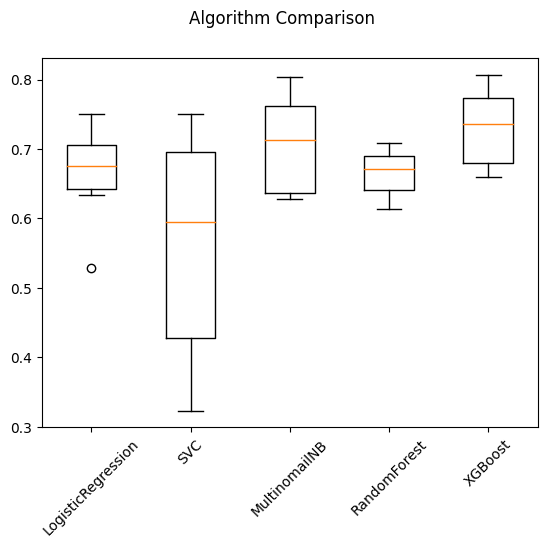

In [80]:
# Compare different Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(model_name,rotation=45)
plt.show()

# We will carry on with XGBoost and try to improve upon it since it gives us a good baseline model